**Author: Kritagya Gupta**

**Topic: Stock Market Prediction using Numerical and Textual Analysis**

**Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines**

Stock to analyze and predict - SENSEX (S&P BSE SENSEX)<br>
Dataset historical stock prices from finance.yahoo.com<br>
Dataset textual (news) data from https://bit.ly/36fFPI6

```

```



**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importing Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
#Importing Text Analysing Libraries
!pip install textblob
from textblob import TextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vader
print("Libraries are Imported")

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
Libraries are Imported


**EXTRACTING SENSEX DATASET**

In [ ]:
data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EBSESN?period1=867715200&period2=1609891200&interval=1d&events=history&includeAdjustedClose=true')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0.0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0.0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0.0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0.0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0.0


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5911,2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0
5912,2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900.0
5913,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
5914,2021-01-04,48109.171875,48220.468750,47594.468750,48176.800781,48176.800781,13900.0
5915,2021-01-05,48037.628906,48486.238281,47903.378906,48437.781250,48437.781250,12200.0


In [ ]:
print("Dimension:{}".format(data.shape),"\n")
print("Size:{}".format(data.size),"\n")
print("Duplicated Values:{}".format(data.duplicated().sum()),"\n")
print("Rows with null values:{}".format(data.isnull().sum()),"\n")
print("Info of Dataset:{}".format(data.info()),"\n")
print("Descriptive Analysis:{}".format(data.describe()),"\n")

Dimension:(5916, 7) 

Size:41412 

Duplicated Values:0 

Rows with null values:Date           0
Open         129
High         129
Low          129
Close        129
Adj Close    129
Volume       129
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5916 non-null   object 
 1   Open       5787 non-null   float64
 2   High       5787 non-null   float64
 3   Low        5787 non-null   float64
 4   Close      5787 non-null   float64
 5   Adj Close  5787 non-null   float64
 6   Volume     5787 non-null   float64
dtypes: float64(6), object(1)
memory usage: 323.7+ KB
Info of Dataset:None 

Descriptive Analysis:               Open          High  ...     Adj Close        Volume
count   5787.000000   5787.000000  ...   5787.000000  5.787000e+03
mean   16456.050216  16557.529609  ...  16437.220388  6.824781e+04
std    11640.787414  1

In [ ]:
data.dropna()
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5911,2020-12-30,47789.031250,47807.851563,47358.359375,47746.218750,47746.218750,15600.0
5912,2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900.0
5913,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
5914,2021-01-04,48109.171875,48220.468750,47594.468750,48176.800781,48176.800781,13900.0
5915,2021-01-05,48037.628906,48486.238281,47903.378906,48437.781250,48437.781250,12200.0


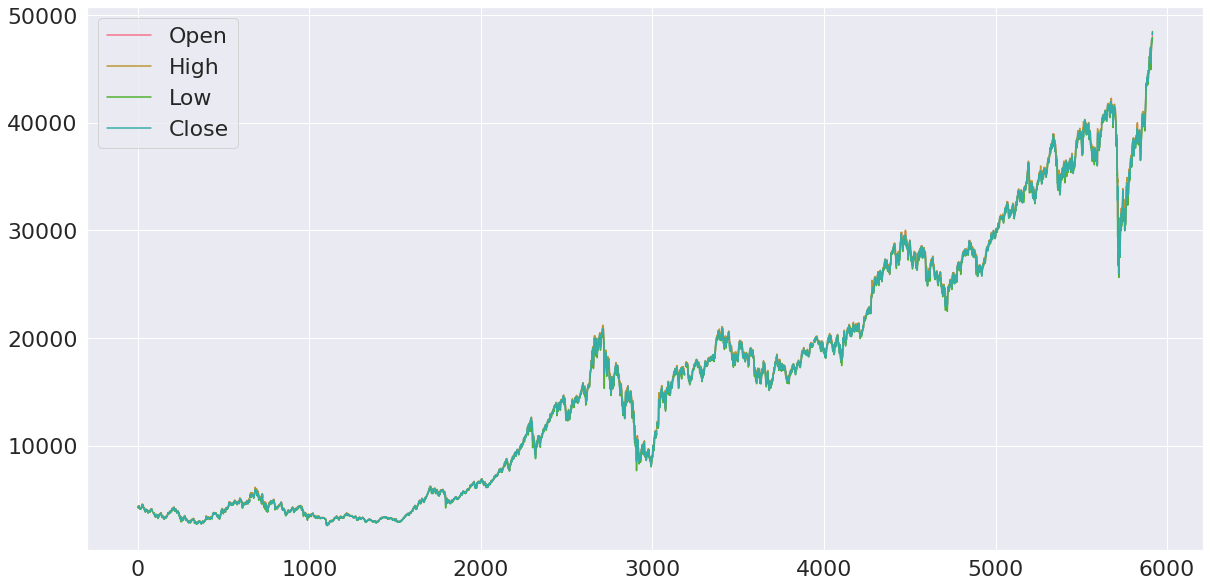

In [ ]:
sns.set_theme(style='darkgrid', palette='husl',font_scale=2)
data[['Open','High','Low','Close']].plot(figsize=(20,10))

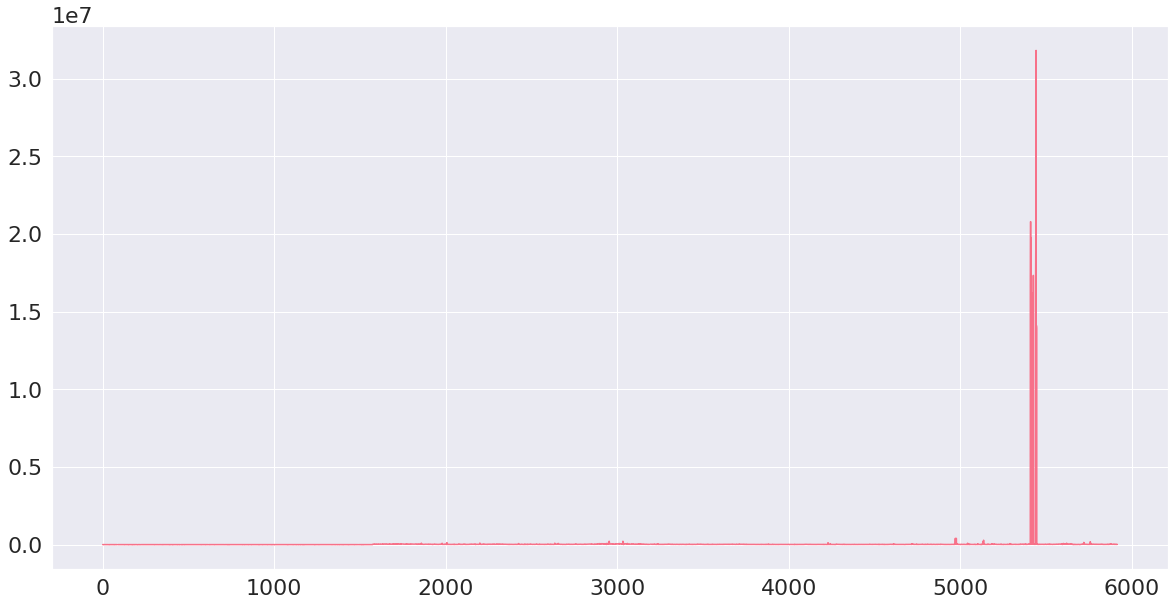

In [ ]:
data['Volume'].plot(figsize=(20,10))

**HEADLINES DATASET**

In [ ]:
data_news = pd.read_csv("https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/DPQMQH/P2Z4PM")
data_news.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [ ]:
data_news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

**PRE PROCESSING DATASET**

In [ ]:
data_news = data_news.rename(columns={'publish_date':'Date'})

In [ ]:
data_news.head()

,Date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [ ]:
data_news['Date'] = pd.to_datetime(data_news['Date'],format='%Y%m%d')
data_news = data_news.drop("headline_category",axis = 1)
data_news.head()

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


In [ ]:
data_news = data_news[data_news['Date']>="2015-10-19"]
data_news.sort_values(by='Date')

,Date,headline_text
2207374,2015-10-19,Here's how to calm your Monday in 5 minutes!
2207834,2015-10-19,All accused in Dadri lynching case arrested
2207835,2015-10-19,LOL: Laugh off your Monday blues!
2207836,2015-10-19,Cops' team heads to TN in search of killers
2207837,2015-10-19,BAI allows 4 'overage' players to compete at n...
...,...,...
3296806,2020-06-30,Mangaluru police jittery as arrested accused t...
3296805,2020-06-30,Madras university gets a patent for finding an...
3296804,2020-06-30,Andhra Pradesh: Rise in caseload; Covid care c...
3296818,2020-06-30,Woman hangs self a day after son's suicide


In [ ]:
data_news['headline_text'] = data_news.groupby(['Date']).transform(lambda x: ' '.join(x))
data_news = data_news.drop_duplicates()
data_news.reset_index()

,index,Date,headline_text
0,2207374,2015-10-19,Here's how to calm your Monday in 5 minutes! I...
1,2208071,2015-10-20,How much water should you drink every day? Way...
2,2208771,2015-10-21,How to find the pleasure spots in your man Pak...
3,2209470,2015-10-22,Cancer: 12 foods to battle cancer Top 5 health...
4,2210166,2015-10-23,How to beat that bloating feeling 10 alternate...
...,...,...,...
1712,3294593,2020-06-26,Containment zone residents slam high prices ch...
1713,3295093,2020-06-27,like me i wont let you have a toxic relationsh...
1714,3295620,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
1715,3296120,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [ ]:
print("Dimension:{}".format(data_news.shape),"\n")
print("Size:{}".format(data_news.size),"\n")
print("Duplicated Values:{}".format(data_news.duplicated().sum()),"\n")
print("Rows with null values:{}".format(data_news.isnull().sum()),"\n")
print("Info of Dataset:{}".format(data_news.info()),"\n")

Dimension:(1717, 2) 

Size:3434 

Duplicated Values:0 

Rows with null values:Date             0
headline_text    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717 entries, 2207374 to 3296636
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1717 non-null   datetime64[ns]
 1   headline_text  1717 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 40.2+ KB
Info of Dataset:None 



In [ ]:
data = data[data['Date']<='2020-06-30']
data['Date']=pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0.0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0.0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0.0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0.0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0.0


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5779,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
5780,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
5781,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
5782,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0
5783,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0


In [ ]:
df2 = data_news.drop_duplicates()
df2.duplicated().sum()

0

**WORD COUNT**

In [ ]:
df2['word_count'] = df2['headline_text'].apply(lambda x: len(str(x).split(" ")))
df2[['headline_text','word_count']].head()

,headline_text,word_count
2207374,Here's how to calm your Monday in 5 minutes! I...,5467
2208071,How much water should you drink every day? Way...,5774
2208771,How to find the pleasure spots in your man Pak...,5672
2209470,Cancer: 12 foods to battle cancer Top 5 health...,5591
2210166,How to beat that bloating feeling 10 alternate...,5732


**COUNT OF CHARACTERS**

In [ ]:
df2['char_count'] = df2['headline_text'].str.len()
df2[['headline_text','char_count']].head()

,headline_text,char_count
2207374,Here's how to calm your Monday in 5 minutes! I...,34147
2208071,How much water should you drink every day? Way...,35830
2208771,How to find the pleasure spots in your man Pak...,34863
2209470,Cancer: 12 foods to battle cancer Top 5 health...,34404
2210166,How to beat that bloating feeling 10 alternate...,35645


**AVERAGE WORD LENGTH**

In [ ]:
def avg_word(sentence):
    words = sentence.split()
    return(sum(len(word) for word in words)/len(words))
df2['avg_word'] = df2['headline_text'].apply(lambda x: avg_word(x))
df2[['headline_text','avg_word']].head()

,headline_text,avg_word
2207374,Here's how to calm your Monday in 5 minutes! I...,5.246204
2208071,How much water should you drink every day? Way...,5.205577
2208771,How to find the pleasure spots in your man Pak...,5.146685
2209470,Cancer: 12 foods to battle cancer Top 5 health...,5.153640
2210166,How to beat that bloating feeling 10 alternate...,5.218772


**NUMBER OF STOPWORDS**

In [ ]:
stop = stopwords.words('english')
df2['stopwords'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df2[['headline_text','stopwords']].head()

,headline_text,stopwords
2207374,Here's how to calm your Monday in 5 minutes! I...,1118
2208071,How much water should you drink every day? Way...,1216
2208771,How to find the pleasure spots in your man Pak...,1216
2209470,Cancer: 12 foods to battle cancer Top 5 health...,1171
2210166,How to beat that bloating feeling 10 alternate...,1196


**NUMBER OF SPECIAL CHARACTERS IN EACH STATEMENT**

In [ ]:
df2['hashtags'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df2[['headline_text','hashtags']].head()

,headline_text,hashtags
2207374,Here's how to calm your Monday in 5 minutes! I...,0
2208071,How much water should you drink every day? Way...,0
2208771,How to find the pleasure spots in your man Pak...,0
2209470,Cancer: 12 foods to battle cancer Top 5 health...,0
2210166,How to beat that bloating feeling 10 alternate...,0


**NUMBER OF NUMERICS IN EACH STATEMENT**

In [ ]:
df2['numerics'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df2[['headline_text','numerics']].head()

,headline_text,numerics
2207374,Here's how to calm your Monday in 5 minutes! I...,81
2208071,How much water should you drink every day? Way...,75
2208771,How to find the pleasure spots in your man Pak...,86
2209470,Cancer: 12 foods to battle cancer Top 5 health...,87
2210166,How to beat that bloating feeling 10 alternate...,94


**NUMBER OF UPPERCASE WORDS IN EACH ROW**

In [ ]:
df2['upper'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df2[['headline_text','upper']].head()

,headline_text,upper
2207374,Here's how to calm your Monday in 5 minutes! I...,202
2208071,How much water should you drink every day? Way...,257
2208771,How to find the pleasure spots in your man Pak...,247
2209470,Cancer: 12 foods to battle cancer Top 5 health...,237
2210166,How to beat that bloating feeling 10 alternate...,228


**CONVERTING EVERY WORD TO LOWER CASE**

In [ ]:
df2['headline_text'] = df2['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['headline_text'].head()

2207374    here's how to calm your monday in 5 minutes! i...
2208071    how much water should you drink every day? way...
2208771    how to find the pleasure spots in your man pak...
2209470    cancer: 12 foods to battle cancer top 5 health...
2210166    how to beat that bloating feeling 10 alternate...
Name: headline_text, dtype: object

**REMOVING PUNCTUATIONS**

In [ ]:
df2['headline_text'] = df2['headline_text'].str.replace('[^\w\s]','')
df2['headline_text'].head()

2207374    heres how to calm your monday in 5 minutes in ...
2208071    how much water should you drink every day ways...
2208771    how to find the pleasure spots in your man pak...
2209470    cancer 12 foods to battle cancer top 5 healthi...
2210166    how to beat that bloating feeling 10 alternate...
Name: headline_text, dtype: object

**REMOVING STOPWORDS**

In [ ]:
stop = stopwords.words('english')
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))
df2['headline_text'].head()

2207374    heres calm monday 5 minutes pics 7 super ways ...
2208071    much water drink every day ways identify diffe...
2208771    find pleasure spots man pak singers faced crit...
2209470    cancer 12 foods battle cancer top 5 healthiest...
2210166    beat bloating feeling 10 alternate treatments ...
Name: headline_text, dtype: object

**REMOVING COMMON WORDS**

In [ ]:
common = pd.Series(' '.join(df2['headline_text']).split()).value_counts()[:20]
common

rs          32004
new         25184
held        23494
says        23454
man         22815
get         19584
delhi       18832
two         17985
india       17839
govt        17481
cops        17101
2           17034
police      16718
bjp         16531
city        16524
may         16386
hc          15198
case        15087
students    15036
court       14772
dtype: int64

In [ ]:
common = list(common.index)
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in common))
df2['headline_text'].tail()

3294593    containment zone residents slam high prices ch...
3295093    like wont let toxic relationship food major ra...
3295620    atanu ghosh plans rewrite old scripts make rel...
3296120    6 hot stylish bikini looks katrina kaif anna e...
3296636    detective byomkesh bakshy edge tomorrow first ...
Name: headline_text, dtype: object

**REMOVING WORDS TO GET RID OF NOISE**

In [ ]:
common = pd.Series(' '.join(df2['headline_text']).split()).value_counts()[-10:]
common

mohra21      1
mahale       1
khandalas    1
hydrogel     1
shawarma     1
iitmit       1
ameerkot     1
jyothikas    1
fourball     1
bhanja       1
dtype: int64

In [ ]:
common = list(common.index)
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in common))
df2['headline_text'].head()

2207374    heres calm monday 5 minutes pics 7 super ways ...
2208071    much water drink every day ways identify diffe...
2208771    find pleasure spots pak singers faced criticis...
2209470    cancer 12 foods battle cancer top 5 healthiest...
2210166    beat bloating feeling 10 alternate treatments ...
Name: headline_text, dtype: object

In [ ]:
df2.shape

(1717, 9)

In [ ]:
Data = df2

In [ ]:
Data.shape

(1717, 9)

**TOKENIZATION**

In [ ]:
TextBlob(str(Data['headline_text'])).words

WordList(['2207374', 'heres', 'calm', 'monday', '5', 'minutes', 'pics', '7', 'super', 'ways', '2208071', 'much', 'water', 'drink', 'every', 'day', 'ways', 'identify', 'diffe', '2208771', 'find', 'pleasure', 'spots', 'pak', 'singers', 'faced', 'criticis', '2209470', 'cancer', '12', 'foods', 'battle', 'cancer', 'top', '5', 'healthiest', '2210166', 'beat', 'bloating', 'feeling', '10', 'alternate', 'treatments', '3294593', 'containment', 'zone', 'residents', 'slam', 'high', 'prices', 'ch', '3295093', 'like', 'wont', 'let', 'toxic', 'relationship', 'food', 'major', 'ra', '3295620', 'atanu', 'ghosh', 'plans', 'rewrite', 'old', 'scripts', 'make', 'rel', '3296120', '6', 'hot', 'stylish', 'bikini', 'looks', 'katrina', 'kaif', 'anna', 'e', '3296636', 'detective', 'byomkesh', 'bakshy', 'edge', 'tomorrow', 'first', 'Name', 'headline_text', 'Length', '1717', 'dtype', 'object'])

**STEMMING**

In [ ]:
st = PorterStemmer()
Data['headline_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

2207374    here calm monday 5 minut pic 7 super way wont ...
2208071    much water drink everi day way identifi differ...
2208771    find pleasur spot pak singer face critic thapp...
2209470    cancer 12 food battl cancer top 5 healthiest a...
2210166    beat bloat feel 10 altern treatment depress 8 ...
                                 ...                        
3294593    contain zone resid slam high price charg veget...
3295093    like wont let toxic relationship food major ra...
3295620    atanu ghosh plan rewrit old script make relev ...
3296120    6 hot stylish bikini look katrina kaif anna ed...
3296636    detect byomkesh bakshi edg tomorrow first look...
Name: headline_text, Length: 1717, dtype: object

**PERFORMING SENTIMENTAL ANALYSIS ON EACH ROW OF HEADLINE_TEXT**

In [ ]:
Data['sentiment'] = Data['headline_text'].apply(lambda x: TextBlob(x).sentiment[0])
Data[['headline_text','sentiment']].head()

,headline_text,sentiment
2207374,heres calm monday 5 minutes pics 7 super ways ...,0.089433
2208071,much water drink every day ways identify diffe...,0.045460
2208771,find pleasure spots pak singers faced criticis...,0.087048
2209470,cancer 12 foods battle cancer top 5 healthiest...,0.077245
2210166,beat bloating feeling 10 alternate treatments ...,0.053181


In [ ]:
Data1 = Data[['Date','headline_text','sentiment']].reset_index()
Data1 = Data1.drop('index',axis = 1)

In [ ]:
Data1

,Date,headline_text,sentiment
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,0.089433
1,2015-10-20,much water drink every day ways identify diffe...,0.045460
2,2015-10-21,find pleasure spots pak singers faced criticis...,0.087048
3,2015-10-22,cancer 12 foods battle cancer top 5 healthiest...,0.077245
4,2015-10-23,beat bloating feeling 10 alternate treatments ...,0.053181
...,...,...,...
1712,2020-06-26,containment zone residents slam high prices ch...,0.039440
1713,2020-06-27,like wont let toxic relationship food major ra...,0.065225
1714,2020-06-28,atanu ghosh plans rewrite old scripts make rel...,0.032367
1715,2020-06-29,6 hot stylish bikini looks katrina kaif anna e...,0.038249


**ANALYZING OUR SENSEX DATA**

In [ ]:
Data_news = data[(data['Date']>='2015-10-19')&(data['Date']<='2020-06-30')]
Data_news

,Date,Open,High,Low,Close,Adj Close,Volume
4630,2015-10-19,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0
4631,2015-10-20,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0
4632,2015-10-21,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0
4633,2015-10-23,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0
4634,2015-10-26,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0
...,...,...,...,...,...,...,...
5779,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
5780,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
5781,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
5782,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [ ]:
Data_news.shape

(1154, 7)

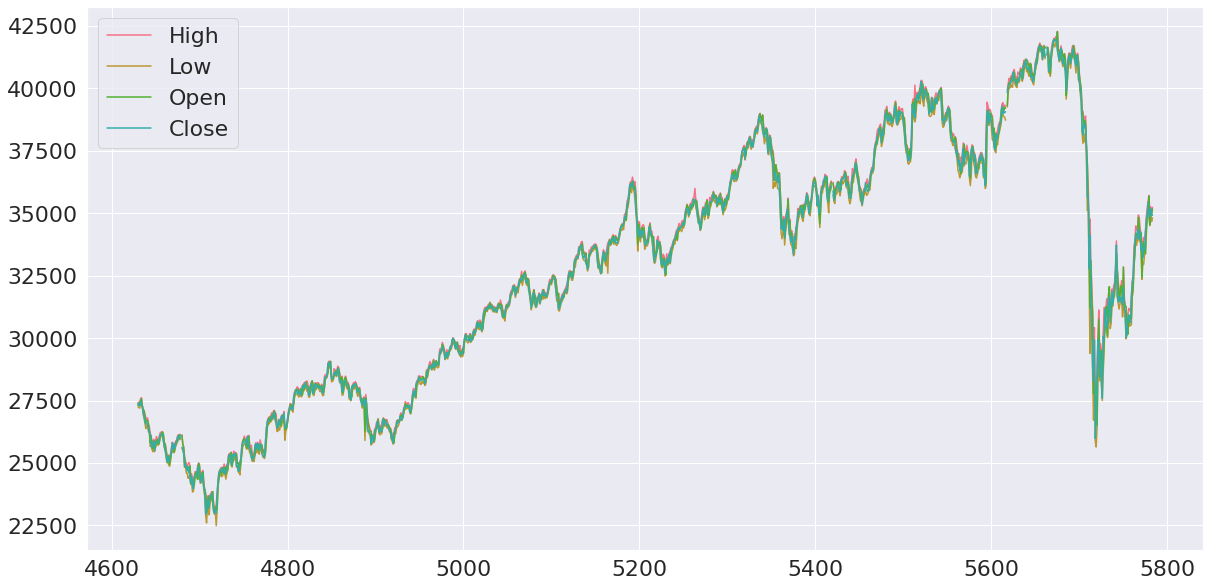

In [ ]:
Data_news[['High','Low','Open','Close']].plot(figsize=(20,10))

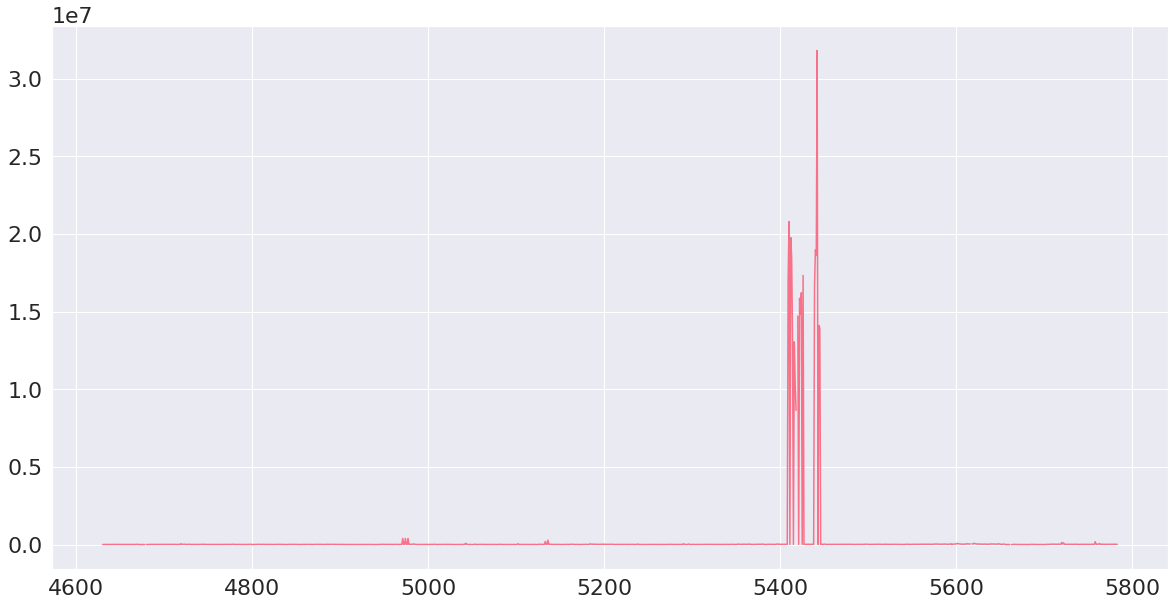

In [ ]:
Data_news['Volume'].plot(figsize=(20,10))

**CREATING A HYBRID MODEL BY MERGING NEWS DATA AND SENSEX DATA**

In [ ]:
DataMerge = pd.merge(Data,Data_news,on='Date',how='right')
DataMerge

,Date,headline_text,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment,Open,High,Low,Close,Adj Close,Volume
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,5467,34147,5.246204,1118,0,81,202,0.089433,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0
1,2015-10-20,much water drink every day ways identify diffe...,5774,35830,5.205577,1216,0,75,257,0.045460,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0
2,2015-10-21,find pleasure spots pak singers faced criticis...,5672,34863,5.146685,1216,0,86,247,0.087048,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0
3,2015-10-23,beat bloating feeling 10 alternate treatments ...,5732,35645,5.218772,1196,0,94,228,0.053181,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0
4,2015-10-26,7 worst sexual fears men dos donts diabetics n...,5575,34314,5.155157,1160,0,79,246,0.096162,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2020-06-24,never thought voice today vidya rajput never t...,4503,28022,5.223185,842,0,95,193,0.064382,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
1150,2020-06-25,truck firms look export markets sell bs6 range...,4609,28565,5.197874,911,0,112,167,-0.007864,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
1151,2020-06-26,containment zone residents slam high prices ch...,4508,28026,5.217169,884,0,100,185,0.039440,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
1152,2020-06-29,6 hot stylish bikini looks katrina kaif anna e...,4800,29805,5.209583,991,1,133,156,0.038249,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [ ]:
DataMerge.dropna()

,Date,headline_text,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment,Open,High,Low,Close,Adj Close,Volume
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,5467,34147,5.246204,1118,0,81,202,0.089433,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0
1,2015-10-20,much water drink every day ways identify diffe...,5774,35830,5.205577,1216,0,75,257,0.045460,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0
2,2015-10-21,find pleasure spots pak singers faced criticis...,5672,34863,5.146685,1216,0,86,247,0.087048,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0
3,2015-10-23,beat bloating feeling 10 alternate treatments ...,5732,35645,5.218772,1196,0,94,228,0.053181,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0
4,2015-10-26,7 worst sexual fears men dos donts diabetics n...,5575,34314,5.155157,1160,0,79,246,0.096162,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2020-06-24,never thought voice today vidya rajput never t...,4503,28022,5.223185,842,0,95,193,0.064382,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
1150,2020-06-25,truck firms look export markets sell bs6 range...,4609,28565,5.197874,911,0,112,167,-0.007864,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
1151,2020-06-26,containment zone residents slam high prices ch...,4508,28026,5.217169,884,0,100,185,0.039440,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0
1152,2020-06-29,6 hot stylish bikini looks katrina kaif anna e...,4800,29805,5.209583,991,1,133,156,0.038249,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0


In [ ]:
print("Dimension:{}".format(DataMerge.shape),"\n")
print("Size:{}".format(DataMerge.size),"\n")
print("Duplicated Values:{}".format(DataMerge.duplicated().sum()),"\n")
print("Rows with null values:{}".format(DataMerge.isnull().sum()),"\n")
print("Info of Dataset:\n")
print(DataMerge.info(),'\n')

Dimension:(1154, 16) 

Size:18464 

Duplicated Values:0 

Rows with null values:Date             0
headline_text    0
word_count       0
char_count       0
avg_word         0
stopwords        0
hashtags         0
numerics         0
upper            0
sentiment        0
Open             4
High             4
Low              4
Close            4
Adj Close        4
Volume           4
dtype: int64 

Info of Dataset:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1153
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1154 non-null   datetime64[ns]
 1   headline_text  1154 non-null   object        
 2   word_count     1154 non-null   int64         
 3   char_count     1154 non-null   int64         
 4   avg_word       1154 non-null   float64       
 5   stopwords      1154 non-null   int64         
 6   hashtags       1154 non-null   int64         
 7   numerics    

In [ ]:
DataMerge = DataMerge.dropna(how='any',axis=0) 

In [ ]:
print("Rows with null values:{}".format(DataMerge.isnull().sum()),"\n")

Rows with null values:Date             0
headline_text    0
word_count       0
char_count       0
avg_word         0
stopwords        0
hashtags         0
numerics         0
upper            0
sentiment        0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64 



In [ ]:
DataMerge = DataMerge.drop_duplicates()
DataMerge.duplicated().sum()

0

In [ ]:
df=[]
sid = vader()
DataMerge['scores'] = DataMerge['headline_text'].apply(lambda x: sid.polarity_scores(x))
DataMerge.head()

,Date,headline_text,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment,Open,High,Low,Close,Adj Close,Volume,scores
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,5467,34147,5.246204,1118,0,81,202,0.089433,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0,"{'neg': 0.179, 'neu': 0.698, 'pos': 0.123, 'co..."
1,2015-10-20,much water drink every day ways identify diffe...,5774,35830,5.205577,1216,0,75,257,0.045460,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0,"{'neg': 0.171, 'neu': 0.714, 'pos': 0.115, 'co..."
2,2015-10-21,find pleasure spots pak singers faced criticis...,5672,34863,5.146685,1216,0,86,247,0.087048,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0,"{'neg': 0.172, 'neu': 0.704, 'pos': 0.124, 'co..."
3,2015-10-23,beat bloating feeling 10 alternate treatments ...,5732,35645,5.218772,1196,0,94,228,0.053181,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0,"{'neg': 0.169, 'neu': 0.703, 'pos': 0.128, 'co..."
4,2015-10-26,7 worst sexual fears men dos donts diabetics n...,5575,34314,5.155157,1160,0,79,246,0.096162,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0,"{'neg': 0.154, 'neu': 0.715, 'pos': 0.131, 'co..."


**CREATING NEW COLUMNS COMPOUND, POS,NEG,NEU WHICH WILL HAVE POLARITY SCORES**

In [ ]:
DataMerge['compound'] = DataMerge['scores'].apply(lambda score_dict: score_dict['compound'])
DataMerge['pos'] = DataMerge['scores'].apply(lambda score_dict: score_dict['pos'])
DataMerge['neg'] = DataMerge['scores'].apply(lambda score_dict: score_dict['neg'])
DataMerge['neu'] = DataMerge['scores'].apply(lambda score_dict: score_dict['neu'])

In [ ]:
DataMerge = DataMerge.drop('scores',axis=1)
DataMerge

,Date,headline_text,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment,Open,High,Low,Close,Adj Close,Volume,compound,pos,neg,neu
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,5467,34147,5.246204,1118,0,81,202,0.089433,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0,-0.9998,0.123,0.179,0.698
1,2015-10-20,much water drink every day ways identify diffe...,5774,35830,5.205577,1216,0,75,257,0.045460,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0,-0.9999,0.115,0.171,0.714
2,2015-10-21,find pleasure spots pak singers faced criticis...,5672,34863,5.146685,1216,0,86,247,0.087048,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0,-0.9997,0.124,0.172,0.704
3,2015-10-23,beat bloating feeling 10 alternate treatments ...,5732,35645,5.218772,1196,0,94,228,0.053181,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0,-0.9997,0.128,0.169,0.703
4,2015-10-26,7 worst sexual fears men dos donts diabetics n...,5575,34314,5.155157,1160,0,79,246,0.096162,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0,-0.9993,0.131,0.154,0.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2020-06-24,never thought voice today vidya rajput never t...,4503,28022,5.223185,842,0,95,193,0.064382,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,-0.9997,0.090,0.145,0.765
1150,2020-06-25,truck firms look export markets sell bs6 range...,4609,28565,5.197874,911,0,112,167,-0.007864,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,-0.9999,0.078,0.173,0.749
1151,2020-06-26,containment zone residents slam high prices ch...,4508,28026,5.217169,884,0,100,185,0.039440,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,-0.9998,0.096,0.163,0.740
1152,2020-06-29,6 hot stylish bikini looks katrina kaif anna e...,4800,29805,5.209583,991,1,133,156,0.038249,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,-0.9998,0.095,0.161,0.744


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


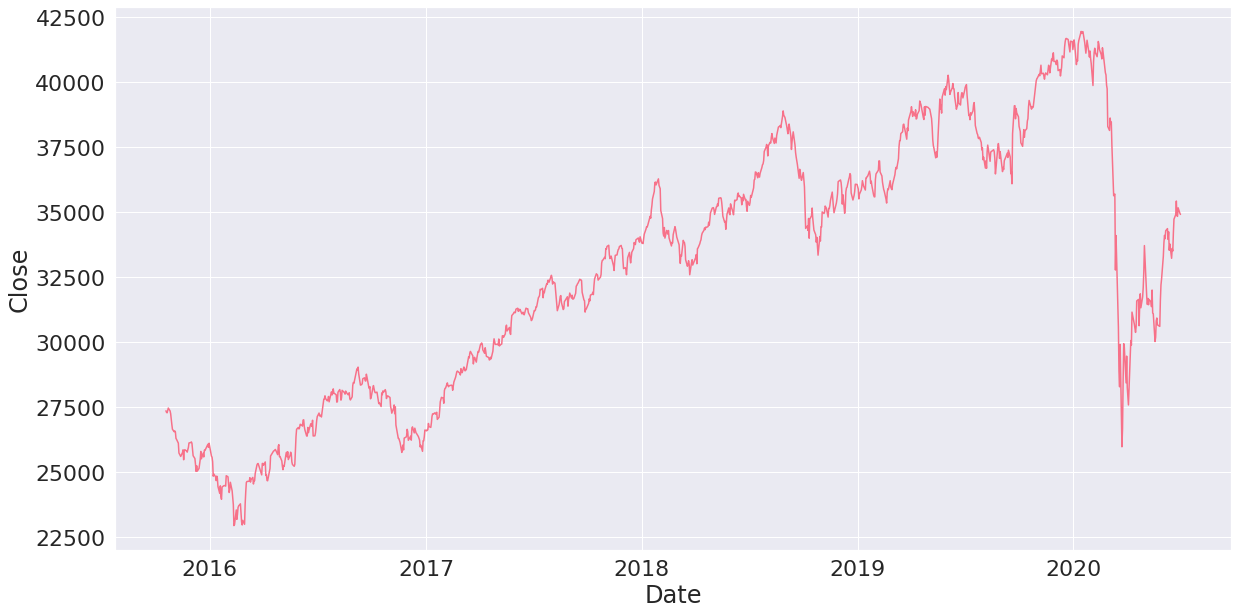

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(DataMerge['Date'],DataMerge['Close'])

**CREATE A COLUMN PRICE_INDICATION WHICH WILL TELL US ABOUT PRICE MOVEMENT THROUGH VALUES 0 AND 1. HERE 0 REPRESENTS DECREASE/UNCHANGED WHERE AS 1 REPRESENTS INCREASED**

In [ ]:
DataMerge['Price_Indication'] = np.where(DataMerge['Close'].shift(-1)>DataMerge['Close'],1,0)
DataMerge.head()

,Date,headline_text,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,sentiment,Open,High,Low,Close,Adj Close,Volume,compound,pos,neg,neu,Price_Indication
0,2015-10-19,heres calm monday 5 minutes pics 7 super ways ...,5467,34147,5.246204,1118,0,81,202,0.089433,27305.619141,27387.910156,27246.789063,27364.919922,27364.919922,8200.0,-0.9998,0.123,0.179,0.698,0
1,2015-10-20,much water drink every day ways identify diffe...,5774,35830,5.205577,1216,0,75,257,0.045460,27402.900391,27432.070313,27216.400391,27306.830078,27306.830078,9200.0,-0.9999,0.115,0.171,0.714,0
2,2015-10-21,find pleasure spots pak singers faced criticis...,5672,34863,5.146685,1216,0,86,247,0.087048,27312.349609,27445.240234,27190.550781,27287.660156,27287.660156,9700.0,-0.9997,0.124,0.172,0.704,1
3,2015-10-23,beat bloating feeling 10 alternate treatments ...,5732,35645,5.218772,1196,0,94,228,0.053181,27466.640625,27555.060547,27421.710938,27470.810547,27470.810547,9900.0,-0.9997,0.128,0.169,0.703,0
4,2015-10-26,7 worst sexual fears men dos donts diabetics n...,5575,34314,5.155157,1160,0,79,246,0.096162,27575.039063,27618.140625,27318.199219,27361.960938,27361.960938,11300.0,-0.9993,0.131,0.154,0.715,0


In [ ]:
DataMerge.columns

Index(['Date', 'headline_text', 'word_count', 'char_count', 'avg_word',
       'stopwords', 'hashtags', 'numerics', 'upper', 'sentiment', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume', 'compound', 'pos', 'neg',
       'neu', 'Price_Indication'],
      dtype='object')

In [ ]:
X = DataMerge[['sentiment','Open','High','Low','Close','Adj Close','compound','pos','neg','neu']]
y = DataMerge['Price_Indication']

**SPLITTING DATASET INTO TRAIN AND TEST WITH RATIO 80% AND 20%**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(920, 10)
(230, 10)


**GRID SEARCH**

In [ ]:
tuned_parameters = [{'max_depth':[10,20],
                    'n_estimators':[10,20],
                    'max_features':['sqrt',0.2]}]
random_clf = RandomForestClassifier()
clf = GridSearchCV(random_clf, tuned_parameters, cv = 5, scoring = 'roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

**BEST SCORE**

In [ ]:
clf.best_score_

0.4823229545517996

**BEST PARAMETERS**

In [ ]:
clf.best_params_

{'max_depth': 10, 'max_features': 0.2, 'n_estimators': 10}

**FINAL MODEL WITH BEST PARAMETERS**

In [ ]:
randomClassifier = RandomForestClassifier(n_estimators = 10, max_features = 'sqrt')
randomClassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**CLASSIFICATION REPORT**

In [ ]:
y_pred = randomClassifier.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46       117
           1       0.46      0.50      0.48       113

    accuracy                           0.47       230
   macro avg       0.47      0.47      0.47       230
weighted avg       0.47      0.47      0.47       230



In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.5304347826086957
Mean Squared Error: 0.5304347826086957
Root Mean Squared Error: 0.7283095376340308
